In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

path = r'C:\Users\User\Instacart Basket Analysis'
df_4_9_ords_prods_merge=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4_8_orders_products_merged.pkl'))

## Creating Bar Charts

<Axes: xlabel='orders_day_of_the_week'>

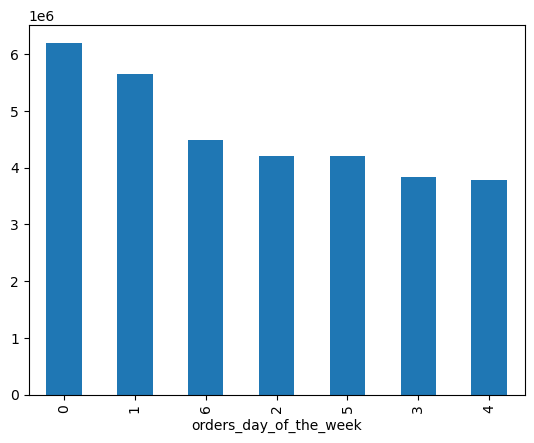

In [2]:
df_4_9_ords_prods_merge['orders_day_of_the_week'].value_counts().plot.bar()

### Sort by index

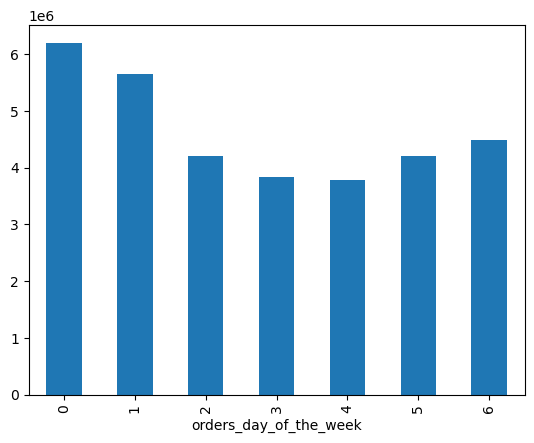

In [3]:
bar = df_4_9_ords_prods_merge['orders_day_of_the_week'].value_counts().sort_index().plot.bar()

#### Color bar

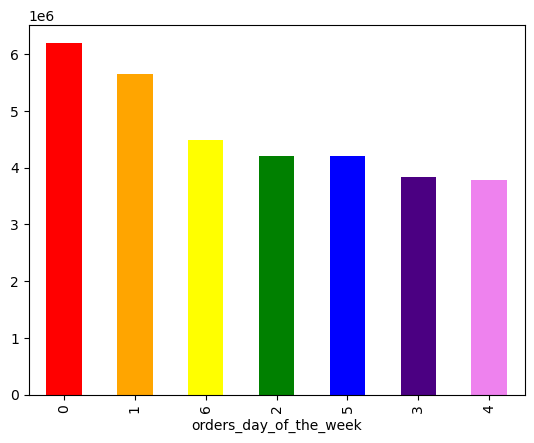

In [4]:
bar = df_4_9_ords_prods_merge['orders_day_of_the_week'].value_counts().plot.bar(color=['red','orange','yellow','green','blue','indigo','violet'])

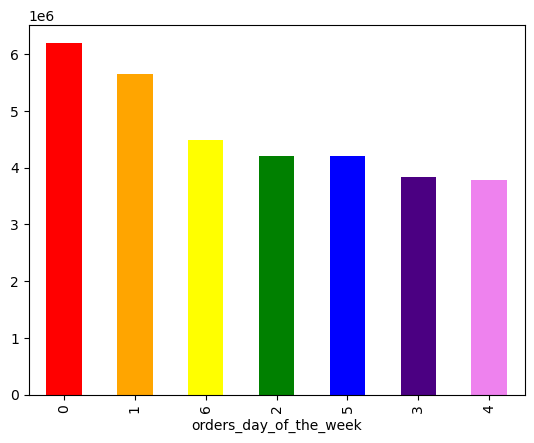

In [5]:
# see bar 
bar.figure

### export bar chart

In [6]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### histogram 

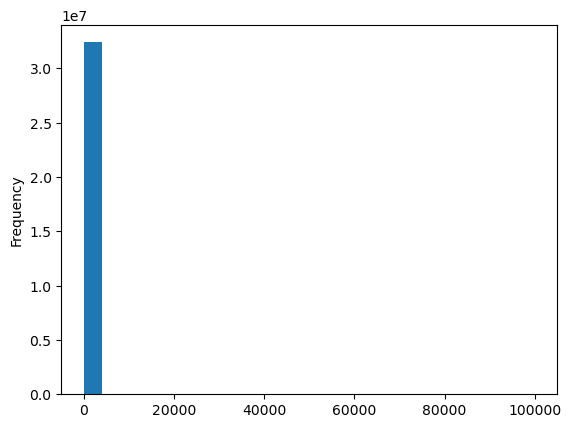

In [7]:
hist = df_4_9_ords_prods_merge['prices'].plot.hist(bins = 25)

### There are outlier values in prices. Make them NaN.   

In [8]:
df_4_9_ords_prods_merge.loc[df_4_9_ords_prods_merge['prices'] >100, 'prices'] = np.NaN

In [9]:
df_4_9_ords_prods_merge['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

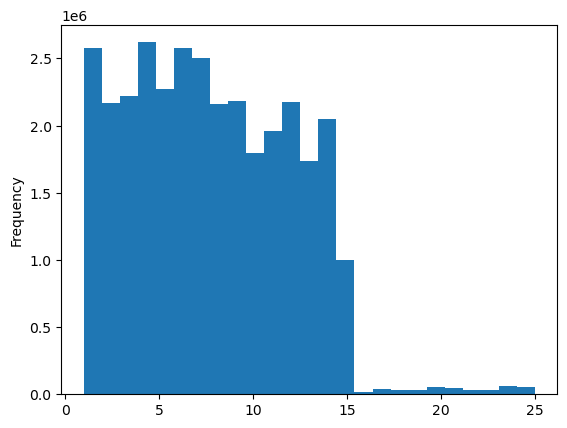

In [10]:
hist = df_4_9_ords_prods_merge['prices'].plot.hist(bins = 25)

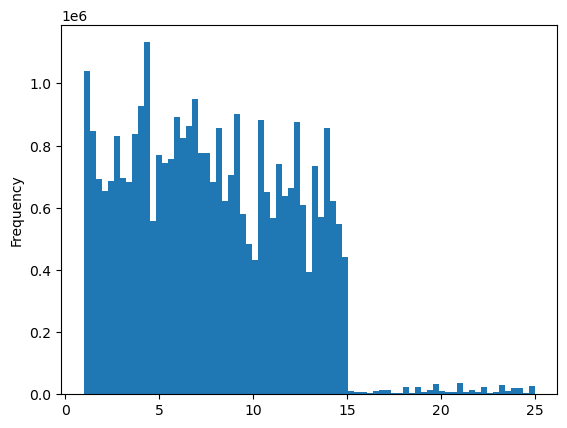

In [11]:
hist = df_4_9_ords_prods_merge['prices'].plot.hist(bins = 75)

### Export histogram

In [12]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

## Random sampling Data

In [13]:
# Create Boolean array 'dev'
np.random.seed(4)
dev = np.random.rand(len(df_4_9_ords_prods_merge)) <= 0.7

In [14]:
# 70% in 'big'
big = df_4_9_ords_prods_merge[dev]

In [15]:
# 30% in 'small'
small = df_4_9_ords_prods_merge[~dev]

In [16]:
len(df_4_9_ords_prods_merge)

32404859

In [17]:
len(big)+len(small)

32404859

In [41]:
# Subsampling from small
df_2 = small[['orders_day_of_the_week', 'order_hour_of_day', 'prices']]

### Line chart

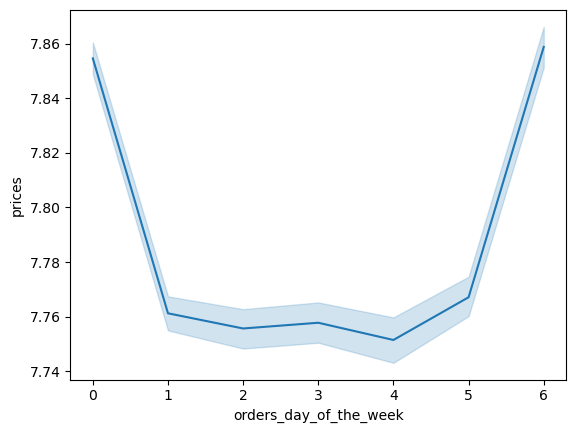

In [19]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_the_week',y = 'prices')

In [20]:
# Export as .pkl
df_4_9_ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', '4_9_orders_products_merged.pkl'))

## 4.9 part 2

### Import united dataframe from 4.9 part 1 

In [21]:
df_orders_products_all=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [29]:
df_orders_products_all.columns

Index(['user_id', 'STATE', 'Age', 'n_dependants', 'fam_status', 'income',
       'product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'order_number', 'orders_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order',
       'days_since_prior_order_Flag', 'add_to_cart_order', 'reordered',
       'max_order', 'loyalty_flag', 'average_price', 'spender_flag',
       'median_freq', 'freq_Flag', '_merge'],
      dtype='object')

### histogram of the “order_hour_of_day”

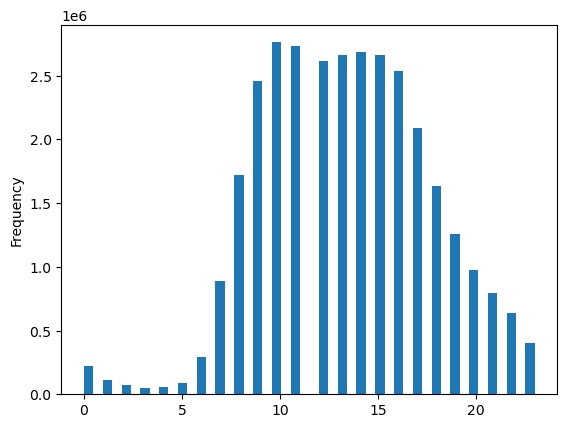

In [34]:
hist2 = df_orders_products_all['order_hour_of_day'].plot.hist(bins = 48)

#### We see that the least number of orders falls between 0 and 6 AM. The greatest number of orders falls between 8  AM and 4 PM.

## Export histogram of the “order_hour_of_day”

In [47]:
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hour_of_day.png'))

### Bar chart of the “loyalty_flag” 

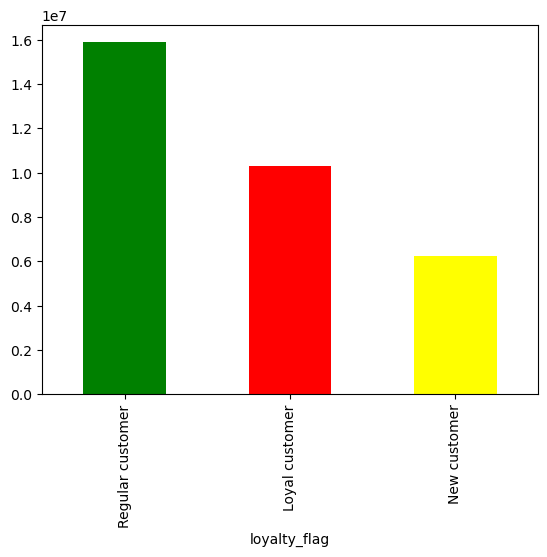

In [38]:
bar2 = df_orders_products_all['loyalty_flag'].value_counts().plot.bar(color=['green','red','yellow'])

#### We see that the number of Regular customers is biggest, and the number of New customers is smallest.

### Export bar chart of the “loyalty_flag”.

In [48]:
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag.png'))

### Line chart of the "order_hour_of_day"

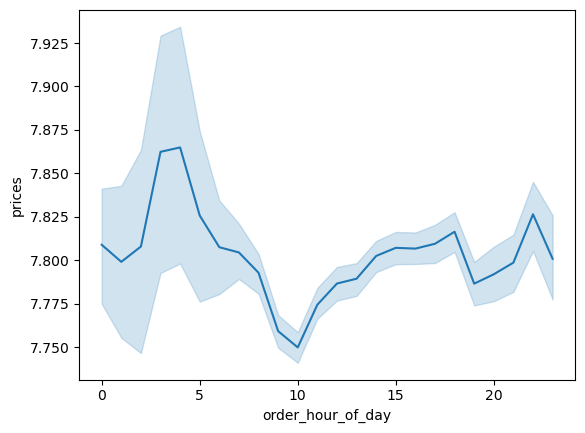

In [42]:
line2 = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')

#### The line chart does not show any real difference in expenditure (the “prices” column) depending on the hour of the day.

### Export line chart of the "order_hour_of_day"

In [49]:
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hour_of_day.png'))

### Connections between age and number of dependents

In [44]:
df_customers=pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'))

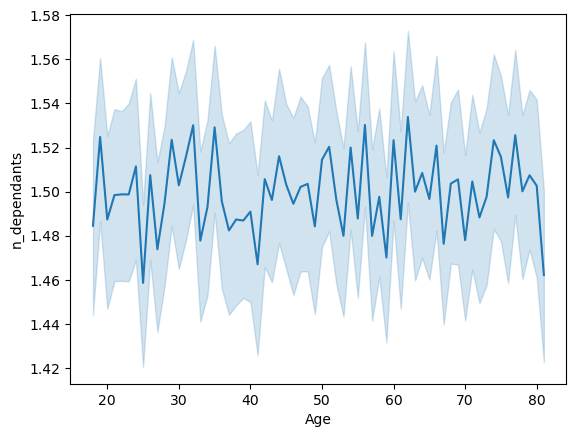

In [45]:
line4 = sns.lineplot(data = df_clineustomers, x = 'Age', y = 'n_dependants')

#### There are no connections between age and number of dependents.

### Export Connections between age and number of dependents

In [50]:
line4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_dependents.png'))

## Connection between age and spending power (income)

### Scatterplot

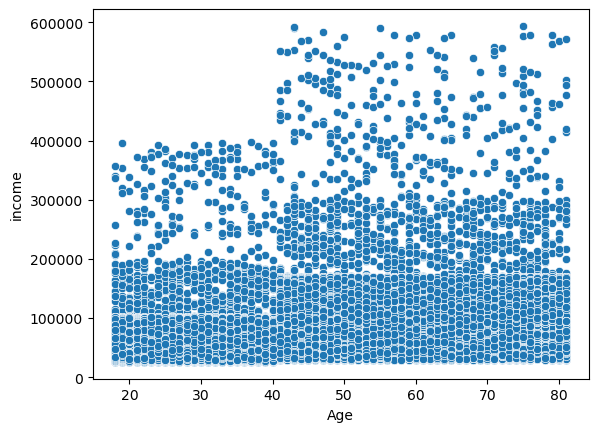

In [46]:
scat1 = sns.scatterplot(x = 'Age', y = 'income',data = df_customers)

#### There is some increase in income after 40 years.

### Export connection between age and spending power (income)

In [51]:
scat1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income.png'))